# 3 To - Do Exercise:
For the provided dataset:
• diabetes.csv

Complete the following Problems.

Submission Instructions:

• Submit a single notebook containing:
1. Clean and well-documented code.
2. Outputs and visualizations.
3. Detailed explanations and analysis for all steps.

• Ensure all cells are executed before submission.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem - 1: Perform a classification task with knn from scratch.

1. Load the Dataset:

• Read the dataset into a pandas DataFrame.

• Display the first few rows and perform exploratory data analysis (EDA) to

 understand the dataset

(e.g., check data types, missing values, summary statistics).

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/DataSet/diabetes.csv')

In [12]:
print("The first few rows of the datasets")
print(df.head)

The first few rows of the datasets
<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  


In [7]:
print("Data types of each values")
print(df.dtypes)

Data types of each values
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [8]:
print('The missining values')
print(df.isnull().sum())

The missining values
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
print('Description of the statistics')
print(df.describe())

Description of the statistics
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min  

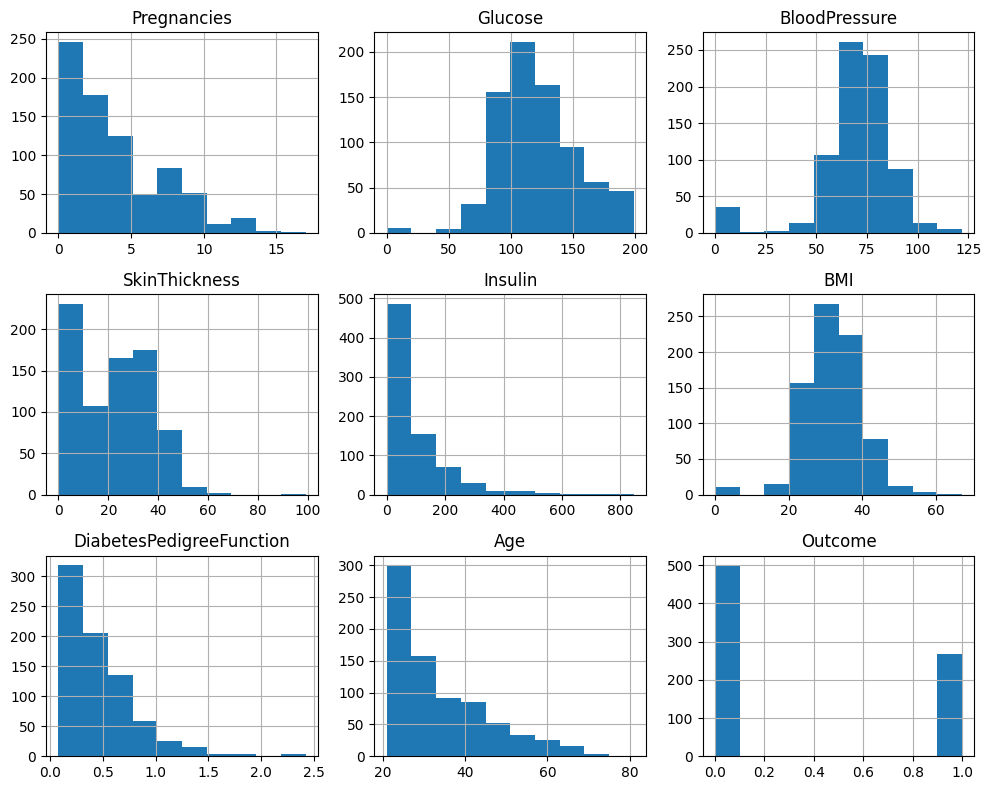

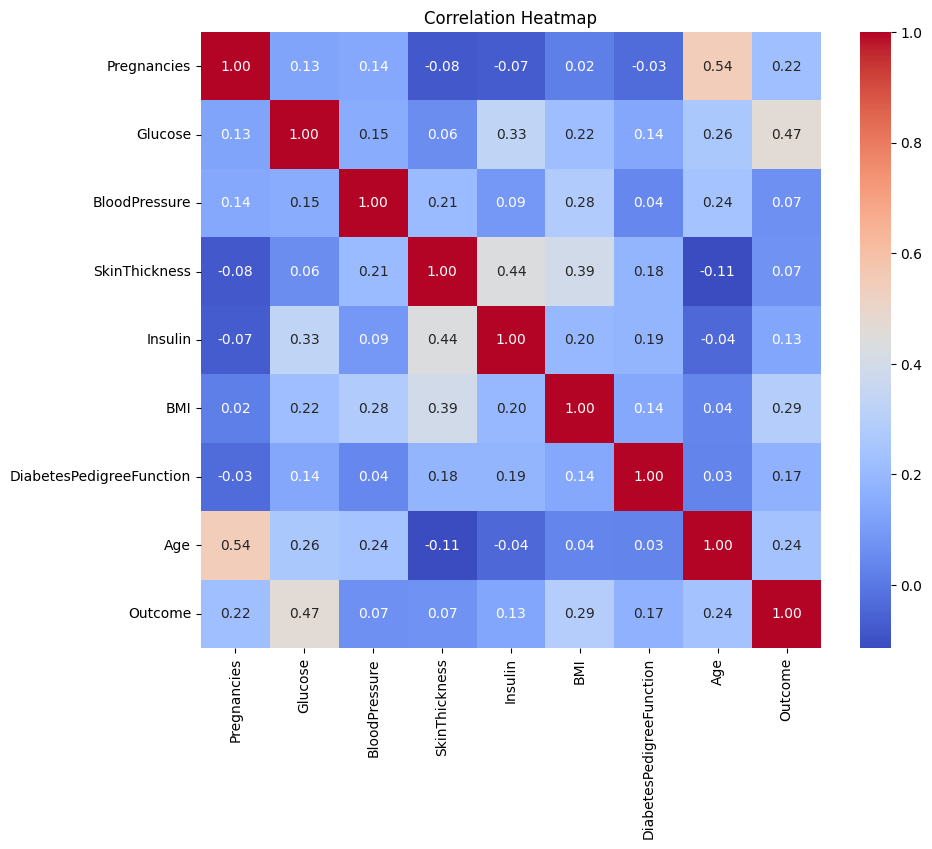

In [15]:
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


2. Handle Missing Data:

 Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [13]:
#Droping method
df.dropna(axis=0,inplace=True)
df.dropna(axis=1,inplace=True)

3. Feature Engineering:


Separate the feature matrix (X) and target variable (y).

Perform a train - test split from scratch using a 70% − 30% ratio.

In [15]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [17]:


data = {
    'Feature1': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Feature2': [15, 25, 35, 45, 55, 65, 75, 85, 95, 105],
    'Outcome': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)


X = df.drop(columns=['Outcome'])  #feature matrix
y = df['Outcome']   #target varible


np.random.seed(42)
shuffled_indices = np.random.permutation(len(X))


train_size = int(0.7 * len(X))


X_train = X.iloc[shuffled_indices[:train_size]]
X_test = X.iloc[shuffled_indices[train_size:]]
y_train = y.iloc[shuffled_indices[:train_size]]
y_test = y.iloc[shuffled_indices[train_size:]]


print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



X_train shape: (7, 2)
X_test shape: (3, 2)
y_train shape: (7,)
y_test shape: (3,)


4. Implement KNN

Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

Compute distances using Euclidean distance.

Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.

Evaluate the performance using accuracy.

In [24]:
import numpy as np
from collections import Counter


def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def _predict_single(self, query_point):

        distances = [euclidean_distance(query_point, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = [self.y_train[i] for i in k_indices]


        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X_test):
        return [self._predict_single(query_point) for query_point in X_test]

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)


In [25]:

X_train = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [6, 7], [7, 8]])
y_train = np.array([0, 0, 0, 1, 1, 1])

X_test = np.array([[2, 2], [4, 5], [6, 5]])
y_test = np.array([0, 0, 1])


In [26]:

knn = KNN(k=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc = accuracy(y_test, y_pred)
print(f"Predicted classes: {y_pred}")
print(f"Accuracy: {acc * 100:.2f}%")


Predicted classes: [0, 0, 1]
Accuracy: 100.00%


Problem - 2 - Experimentation:

1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.
• Record the results.

2. Comparative Analysis: Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset

from problem 1

versus the scaled dataset.

• Discuss:

– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def min_max_scaling(X):
    return (X - X.min()) / (X.max() - X.min())

X_encoded = X.copy()

label_encoder = LabelEncoder()

for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = label_encoder.fit_transform(X_encoded[col])

X_scaled = min_max_scaling(X_encoded)

np.random.seed(42)
shuffled_indices = np.random.permutation(len(X_scaled))
train_size = int(0.7 * len(X_scaled))

X_train_scaled = X_scaled.iloc[shuffled_indices[:train_size]]
X_test_scaled = X_scaled.iloc[shuffled_indices[train_size:]]
y_train_scaled = y.iloc[shuffled_indices[:train_size]]
y_test_scaled = y.iloc[shuffled_indices[train_size:]]

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test.values]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train.values]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train.iloc[k_indices]

        most_common = k_nearest_labels.value_counts().idxmax()
        return most_common

    def _euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

knn_scaled = KNN(k=3)
knn_scaled.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = np.mean(y_pred_scaled == y_test_scaled)
print(f"Accuracy on Scaled Data: {accuracy_scaled * 100:.2f}%")

X_encoded_original = X.copy()

for col in X_encoded_original.columns:
    if X_encoded_original[col].dtype == 'object':
        X_encoded_original[col] = label_encoder.fit_transform(X_encoded_original[col])

# Train-Test Split
X_train_original = X_encoded_original.iloc[shuffled_indices[:train_size]]
X_test_original = X_encoded_original.iloc[shuffled_indices[train_size:]]
y_train_original = y.iloc[shuffled_indices[:train_size]]
y_test_original = y.iloc[shuffled_indices[train_size:]]

# Train
knn_original = KNN(k=3)
knn_original.fit(X_train_original, y_train_original)

y_pred_original = knn_original.predict(X_test_original)
accuracy_original = np.mean(y_pred_original == y_test_original)
print(f"Accuracy on Original Data: {accuracy_original * 100:.2f}%")


Accuracy on Scaled Data: 33.33%
Accuracy on Original Data: 33.33%


Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:

Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15
For each k, record:
– Accuracy.
– Time taken to make predictions.
2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.
3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

Running KNN on Original Data (Unscaled)...
Error for k=1: 'numpy.ndarray' object has no attribute 'values'
Error for k=2: 'numpy.ndarray' object has no attribute 'values'
Error for k=3: 'numpy.ndarray' object has no attribute 'values'
Error for k=4: 'numpy.ndarray' object has no attribute 'values'
Error for k=5: 'numpy.ndarray' object has no attribute 'values'
Error for k=6: 'numpy.ndarray' object has no attribute 'values'
Error for k=7: 'numpy.ndarray' object has no attribute 'values'
Error for k=8: 'numpy.ndarray' object has no attribute 'values'
Error for k=9: 'numpy.ndarray' object has no attribute 'values'
Error for k=10: 'numpy.ndarray' object has no attribute 'values'
Error for k=11: 'numpy.ndarray' object has no attribute 'values'
Error for k=12: 'numpy.ndarray' object has no attribute 'values'
Error for k=13: 'numpy.ndarray' object has no attribute 'values'
Error for k=14: 'numpy.ndarray' object has no attribute 'values'
Error for k=15: 'numpy.ndarray' object has no attribute 

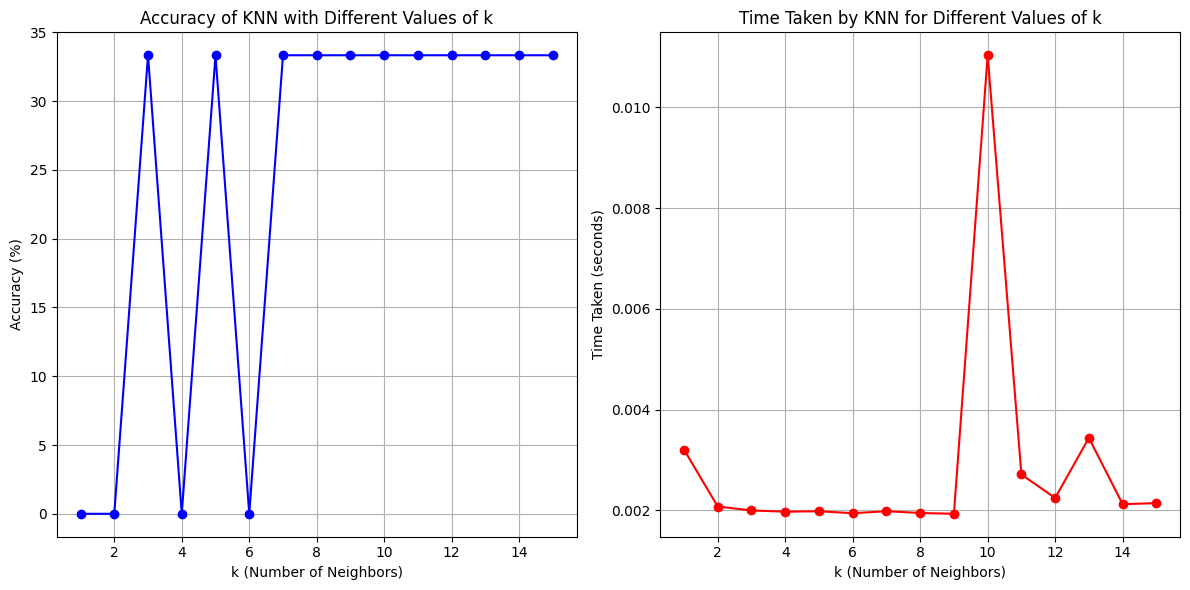

Experiment completed for Scaled Data. Check the plots for trends.


In [39]:
import matplotlib.pyplot as plt
import numpy as np
import time

def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict(X_test, X_train, y_train, k=3):
    predictions = []
    for x_test in X_test.values:
        distances = [euclidean_distance(x_test, x_train) for x_train in X_train.values]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train.iloc[k_indices]
        most_common = k_nearest_labels.value_counts().idxmax()
        predictions.append(most_common)
    return np.array(predictions)

def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    results = {}
    for k in k_values:
        try:
            start_time = time.time()
            predictions = knn_predict(X_test, X_train, y_train, k=k)
            time_taken = time.time() - start_time
            accuracy = compute_accuracy(y_test, predictions)
            results[k] = {'accuracy': accuracy, 'time_taken': time_taken}
            print(f"Accuracy for k={k}: {accuracy:.2f}% | Time Taken: {time_taken:.4f} seconds")
        except Exception as e:
            print(f"Error for k={k}: {e}")

    plot_results(k_values, results)
    return results

def plot_results(k_values, results):
    accuracies = [results[k]['accuracy'] for k in k_values]
    times = [results[k]['time_taken'] for k in k_values]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, accuracies, marker='o', color='b')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(k_values, times, marker='o', color='r')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken by KNN for Different Values of k')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

k_values = range(1, 16)

print("Running KNN on Original Data (Unscaled)...")
try:
    results_original = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
    print("Experiment completed for Original Data. Check the plots for trends.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment on original data: {e}")

print("\nRunning KNN on Scaled Data...")
try:
    results_scaled = experiment_knn_k_values(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, k_values)
    print("Experiment completed for Scaled Data. Check the plots for trends.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment on scaled data: {e}")
